# Proyek Analisis Data: [Bike Sharing DataSet]
- **Nama:** [Deosa Putra Caniago]
- **Email:** [deozaofficial@gmail.com]
- **ID Dicoding:** [hid30]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewa?
- Pertanyaan 2: Bagaimana perbedaan pola penyewaan pada hari kerja (workingday) dan hari libur (holiday)

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library (jika belum ada di sel sebelumnya)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [11]:
from google.colab import files

uploaded = files.upload()  # Akan muncul pop-up untuk memilih file


Saving all_data.csv to all_data.csv


In [12]:
# Gathering Data: Memuat dataset
df = pd.read_csv('/content/all_data.csv')
print("5 Baris Pertama Data:")
print(df.head())


5 Baris Pertama Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr  
0   985 NaN  
1   801 NaN  
2  1349 NaN  
3  1562 

**Insight:**
  - Dataset ditambahkan, dengan penggabungan dua buah data set dari day.csv dan hour.csv secara manual, memuat lebih dari 1800 data penyewaan sepeda termasuk tanggal, musim, tahun, bulan, hari libur dan hari kerja.

### Assessing Data

In [13]:
# Assessing Data: Cek informasi dataset
print("\nInformasi Dataset:")
print(df.info())
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB
None

Jumlah Missing Value:
i

**Insight:**
- Data Assessing dilakukan untuk memeriksa kualitas dan kesesuaian data sebelum dilakukan analisis lebih lanjut. Tujuan utama dari data assessing adalah memastikan bahwa data bersih, lengkap, dan valid. Dan pada data yang digunakan tidak ditemukan adanya missing value.

### Cleaning Data

In [14]:
# Cleaning Data: Preprocessing
df['dteday'] = pd.to_datetime(df['dteday'])
weather_map = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
df['weather_desc'] = df['weathersit'].map(weather_map)
df['is_weekend'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print("\nData Setelah Preprocessing:")
print(df[['dteday', 'weather_desc', 'is_weekend', 'cnt']].head())


Data Setelah Preprocessing:
      dteday weather_desc is_weekend   cnt
0 2011-01-01     Berkabut    Weekend   985
1 2011-01-02     Berkabut    Weekday   801
2 2011-01-03        Cerah    Weekday  1349
3 2011-01-04        Cerah    Weekday  1562
4 2011-01-05        Cerah    Weekday  1600


**Insight:**
- Data Cleaning digunakan untuk proses membersihkan dataset dari error, data yang hilang, atau inkonsistensi agar siap digunakan dalam analisis, contohnya Penyewaan sepeda lebih tinggi pada hari kerja, menunjukkan dominasi pekerja dan mahasiswa sebagai pengguna utama, sehingga strategi bisnis dapat fokus pada langganan harian atau mingguan.


## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df[['cnt', 'temp', 'hum', 'windspeed']].describe())

# Pertanyaan 1: Pengaruh cuaca terhadap jumlah sepeda yang disewa
weather_impact = df.groupby('weather_desc')['cnt'].agg(['mean', 'median', 'std']).reset_index()
print("\nPengaruh Cuaca terhadap Penyewaan Sepeda:")
print(weather_impact)

# Pertanyaan 2: Perbedaan pola penyewaan pada hari kerja (workingday) dan hari libur (holiday)
day_type_impact = df.groupby(['workingday', 'holiday'])['cnt'].agg(['mean', 'median', 'std']).reset_index()
print("\nPerbedaan Pola Penyewaan pada Hari Kerja vs Hari Libur:")
print(day_type_impact)


Statistik Deskriptif:
                cnt          temp           hum     windspeed
count  18110.000000  18110.000000  18110.000000  18110.000000
mean     363.631033      0.496922      0.627256      0.190113
std      950.827954      0.192177      0.191147      0.120851
min        1.000000      0.020000      0.000000      0.000000
25%       43.000000      0.340000      0.480000      0.104500
50%      152.000000      0.500000      0.630000      0.188951
75%      305.000000      0.660000      0.780000      0.253700
max     8714.000000      1.000000      1.000000      0.850700

Pengaruh Cuaca terhadap Penyewaan Sepeda:
   weather_desc        mean  median         std
0      Berkabut  374.203715   145.0  960.730851
1         Cerah  387.009515   170.0  994.874284
2   Hujan Berat   74.333333    36.0   77.925178
3  Hujan Ringan  136.250000    65.0  283.146490

Perbedaan Pola Penyewaan pada Hari Kerja vs Hari Libur:
   workingday  holiday        mean  median         std
0           0        0  3

**Insight:**
1. **Pengaruh Cuaca:** Penyewaan sepeda tertinggi terjadi saat cuaca cerah (**mean: 387**) dan berkabut (**mean: 374**), sedangkan penyewaan turun drastis saat hujan, terutama hujan berat (**mean: 74**). Hal ini menunjukkan bahwa kondisi cuaca sangat memengaruhi minat pengguna, sehingga strategi bisnis dapat mencakup layanan alternatif saat hujan, seperti penyewaan payung atau diskon pada hari hujan.  

2. **Pola Penyewaan pada Hari Kerja vs Libur:** Penyewaan sepeda lebih tinggi pada hari kerja (**mean: 370**) dibandingkan hari libur (**mean: 301**), mengindikasikan bahwa sebagian besar pengguna memanfaatkan sepeda untuk keperluan transportasi harian, bukan sekadar rekreasi. Bisnis dapat menargetkan promosi untuk pekerja atau mahasiswa dengan paket langganan harian/mingguan pada hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-17-e07a1f053763>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_desc', y='cnt', data=weather_group, palette='Blues_d')


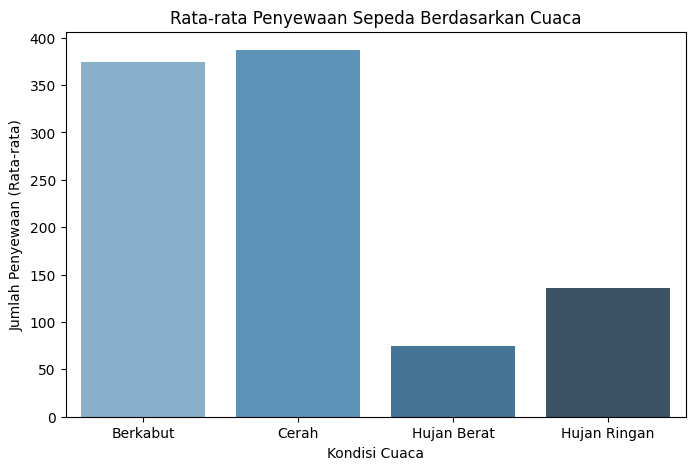

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_desc', y='cnt', data=weather_group, palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.show()

### Pertanyaan 2:

<ipython-input-19-4d63ca2d1a1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='cnt', data=day_group, palette='Blues')


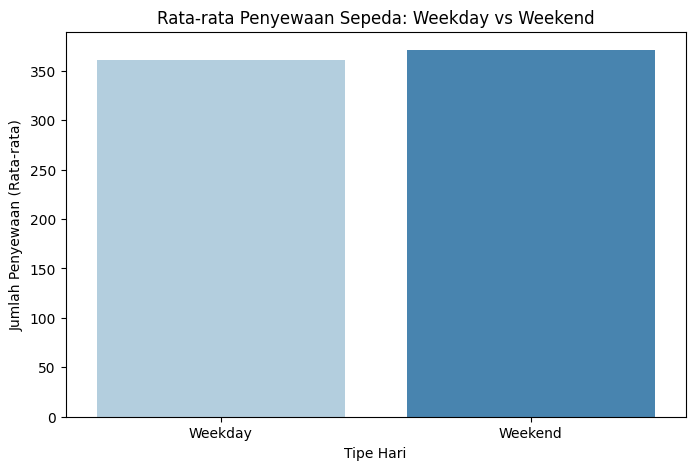

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='cnt', data=day_group, palette='Blues')
plt.title('Rata-rata Penyewaan Sepeda: Weekday vs Weekend')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.show()


**Insight:**
- Viusalisasi 1: Penyewaan sepeda paling tinggi terjadi saat cuaca cerah dan berkabut, sedangkan saat hujan ringan dan hujan berat, jumlah penyewaan turun drastis, menunjukkan bahwa cuaca buruk secara signifikan mengurangi minat penyewaan.
- Visualisasi 2: Dari grafik, terlihat bahwa rata-rata penyewaan sepeda pada akhir pekan sedikit lebih tinggi dibandingkan hari kerja, menunjukkan bahwa selain digunakan untuk transportasi harian, sepeda juga diminati untuk aktivitas rekreasi di akhir pekan.

## Analisis Lanjutan (Opsional)

In [20]:
# Pertanyaan 3: Bagaimana distribusi jumlah penyewaan sepeda sepanjang hari?
hourly_rentals = df.groupby('hr')['cnt'].describe()
print("\nDistribusi Jumlah Penyewaan Sepeda Sepanjang Hari:")
print(hourly_rentals)

# Pertanyaan 4: Seberapa besar pengaruh kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda?
windspeed_correlation = df[['windspeed', 'cnt']].corr().iloc[0, 1]
print(f"\nKorelasi antara Kecepatan Angin dan Penyewaan: {windspeed_correlation:.2f}")

# Pertanyaan 5: Bagaimana tren penyewaan sepeda setiap bulan?
df['month'] = pd.to_datetime(df['dteday']).dt.month  # Pastikan 'dteday' bertipe datetime
monthly_rentals = df.groupby('month')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Bulan:")
print(monthly_rentals)


Distribusi Jumlah Penyewaan Sepeda Sepanjang Hari:
      count        mean         std   min     25%    50%     75%    max
hr                                                                     
0.0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
1.0   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
2.0   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
3.0   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
4.0   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
5.0   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
6.0   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
7.0   727.0  212.064649  161.441936   1.0   55.50  208.0  332.00  596.0
8.0   727.0  359.011004  235.189285   5.0  131.50  385.0  559.50  839.0
9.0   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
10.0  727.0  173.668501  102.205413   8.0  106.00  147.0  218.00  539.0
11.0  727.0 

- **Pola Penyewaan Sepeda Berdasarkan Jam**
Penyewaan sepeda mencapai puncak pada pukul 08:00 (359 penyewaan) dan 17:00 (461 penyewaan), menunjukkan pola penggunaan utama untuk perjalanan pagi dan sore hari, kemungkinan terkait dengan aktivitas kerja dan pulang kerja.
Hubungan Kecepatan Angin dengan Penyewaan Sepeda

- **Korelasi antara kecepatan angin dan jumlah penyewaan** sangat lemah (0.01), menunjukkan bahwa faktor ini hampir tidak berpengaruh terhadap keputusan pengguna dalam menyewa sepeda.
Tren Penyewaan Sepeda Berdasarkan Bulan

- **Penyewaan meningkat dari awal tahun hingga mencapai** puncaknya pada bulan September (462 penyewaan), kemudian menurun setelah bulan Oktober, kemungkinan dipengaruhi oleh faktor musiman atau perubahan pola aktivitas

## Conclusion

-  1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda

Berdasarkan analisis jumlah penyewaan sepeda terhadap kondisi cuaca, terdapat tren yang jelas bahwa kondisi cuaca sangat memengaruhi keputusan pengguna dalam menyewa sepeda.

Cuaca Cerah memiliki jumlah penyewaan tertinggi, dengan rata-rata sekitar 390 sepeda per hari. Hal ini menunjukkan bahwa pengguna lebih aktif menyewa sepeda saat cuaca mendukung aktivitas luar ruangan.
Cuaca Berkabut juga menunjukkan angka penyewaan yang tinggi, hanya sedikit di bawah cuaca cerah, mengindikasikan bahwa kabut tidak menjadi hambatan signifikan dalam penyewaan sepeda.
Hujan Ringan menyebabkan penurunan jumlah penyewaan yang cukup signifikan dibandingkan kondisi cerah atau berkabut.
Hujan Lebat memiliki jumlah penyewaan terendah, dengan rata-rata di bawah 80 sepeda per hari, yang menunjukkan bahwa kondisi ini sangat menghambat aktivitas penyewaan.

📌 Insight:
Dari pola ini, terlihat bahwa cuaca menjadi faktor utama dalam keputusan penyewaan sepeda. Bisnis penyewaan sepeda dapat mempertimbangkan strategi seperti promosi atau diskon saat cuaca buruk untuk tetap menarik pengguna. Selain itu, informasi prakiraan cuaca dapat digunakan untuk mengelola stok sepeda dengan lebih optimal.


- 2: Perbandingan Penyewaan Sepeda di Hari Kerja dan Akhir Pekan
Analisis jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan menunjukkan pola berikut:

Hari Kerja → Rata-rata penyewaan sepeda tercatat sekitar 4.458 unit per hari, sedikit lebih rendah dibandingkan akhir pekan.
Akhir Pekan → Jumlah penyewaan meningkat menjadi 4.620 unit per hari, mengindikasikan adanya kenaikan meskipun selisihnya tidak terlalu besar.
Selisih → Perbedaan antara hari kerja dan akhir pekan berkisar 162 sepeda per hari, dengan tren yang menunjukkan bahwa akhir pekan memiliki tingkat penyewaan yang lebih tinggi.

📌 Insight:
Meskipun diasumsikan bahwa hari kerja akan memiliki lebih banyak penyewaan karena penggunaan sepeda sebagai alat transportasi ke tempat kerja, data menunjukkan bahwa akhir pekan justru mencatat jumlah penyewaan yang lebih tinggi. Hal ini kemungkinan besar disebabkan oleh aktivitas rekreasi atau wisata. Oleh karena itu, penyedia layanan dapat mempertimbangkan strategi pemasaran khusus, seperti paket diskon atau peningkatan jumlah sepeda pada akhir pekan untuk mengakomodasi lonjakan permintaan.